<a href="https://colab.research.google.com/github/llazdll/bodyfat/blob/main/Body_fat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing psycho

In [6]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
bodyfat <- read.csv("/content/bodyfat.csv")
bodyfat <- as.matrix(bodyfat)
bodyfat<-data.matrix(bodyfat[,-c(1:3)])

#Covariance and correlation matrices

In [8]:
print(bodyfat_cov<-round(cov(bodyfat),3))
print(bodyfat_corr<-round(cor(bodyfat),3))

         weight height   neck   chest abdomen     hip   thigh   knee  ankle
weight  863.723 37.341 59.348 221.549 281.411 198.099 134.032 60.473 30.569
height   37.341  6.810  2.037   4.990   5.340   6.957   4.638  3.150  1.739
neck     59.348  2.037  5.909  16.084  19.766  12.799   8.879  3.942  1.969
chest   221.549  4.990 16.084  71.073  83.255  50.094  32.303 14.629  6.901
abdomen 281.411  5.340 19.766  83.255 116.275  67.522  43.399 19.172  8.283
hip     198.099  6.957 12.799  50.094  67.522  51.324  33.715 14.228  6.780
thigh   134.032  4.638  8.879  32.303  43.399  33.715  27.562 10.119  4.803
knee     60.473  3.150  3.942  14.629  19.172  14.228  10.119  5.817  2.500
ankle    30.569  1.739  1.969   6.901   8.283   6.780   4.803  2.500  2.873
biceps   71.071  2.511  5.370  18.540  22.316  16.001  12.078  4.946  2.483
forearm  37.431  1.698  3.063   9.883  10.967   7.890   6.013  2.709  1.435
wrist    20.023  0.969  1.690   5.196   6.240   4.214   2.738  1.496  0.896
        bice

#Bartlett's sphericity test


In [9]:
cortest.bartlett(bodyfat_corr,n=252)

$chisq
[1] 3673.049

$p.value
[1] 0

$df
[1] 66

With a p-value near 0, we reject the null hypothesis, indicating that the correlation matrix is not an identity matrix. This confirms that the variables are correlated, making the dataset appropriate for factor analysis.

#Principal components analysis

The first approach uses the correlation matrix for PCA, computed from the covariance matrix of the bodyfat data:

In [10]:
pca <- princomp(covmat = bodyfat_corr)
summary(pca, loadings = TRUE)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.8556645 1.0232484 0.83230946 0.75356396 0.69288108
Proportion of Variance 0.6795683 0.0872531 0.05772825 0.04732155 0.04000702
Cumulative Proportion  0.6795683 0.7668214 0.82454967 0.87187123 0.91187824
                           Comp.6     Comp.7     Comp.8     Comp.9     Comp.10
Standard deviation     0.53221878 0.50255427 0.45183589 0.40107154 0.277391649
Proportion of Variance 0.02360474 0.02104673 0.01701297 0.01340486 0.006412177
Cumulative Proportion  0.93548298 0.95652971 0.97354268 0.98694755 0.993359725
                           Comp.11     Comp.12
Standard deviation     0.247172539 0.136341607
Proportion of Variance 0.005091189 0.001549086
Cumulative Proportion  0.998450914 1.000000000

Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
weight   0.343         0.130                       0.127         0.103      

This gives a summary of the principal components, including the variance explained by each component, along with the factor loadings for each variable.

Alternatively, PCA can also be performed using the correlation matrix directly, which standardizes the variables before analysis:

In [11]:
pca=princomp(bodyfat,cor = TRUE)
summary(pca)

Importance of components:
                         Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.855668 1.02323438 0.83223395 0.75363672 0.69316015
Proportion of Variance 0.679570 0.08725072 0.05771778 0.04733069 0.04003925
Cumulative Proportion  0.679570 0.76682073 0.82453851 0.87186920 0.91190845
                           Comp.6     Comp.7     Comp.8     Comp.9     Comp.10
Standard deviation     0.53275074 0.50223059 0.45134578 0.40116294 0.276917766
Proportion of Variance 0.02365195 0.02101963 0.01697608 0.01341098 0.006390287
Cumulative Proportion  0.93556039 0.95658002 0.97355611 0.98696708 0.993357370
                           Comp.11     Comp.12
Standard deviation     0.246925531 0.136891712
Proportion of Variance 0.005081018 0.001561612
Cumulative Proportion  0.998438388 1.000000000

Methods for Determining the Number of Principal Components to Retain:

1.  **Standard Deviation Greater Than 1 (Kaiser Criterion)**
A common rule of thumb is to retain principal components with a standard deviation (or eigenvalue) greater than 1. This method is based on the assumption that components with eigenvalues less than 1 contribute less variance than a single observed variable, so they are not worth retaining.

2.   **Cumulative Proportion Difference**
Another approach is to examine the cumulative proportion of variance explained by the components. If the difference between the cumulative proportions of two consecutive components is greater than 0.1, this indicates a significant contribution of the components to the overall variance, and both should be retained.

3.  **Screen Plot Examination**
A third method involves visually inspecting a scree plot, which shows the eigenvalues or explained variance of the principal components. The "elbow" of the plot, where the eigenvalues start to level off, indicates the point where the added components no longer significantly contribute to the variance. The components before this point are usually retained.

In [20]:
# Create an empty vector to store differences between sdev
dif <- c()

# Loop through sdev and calculate absolute differences between consecutive values
for (i in 1:(length(pca$sdev) - 1)) {  # Adjust loop to avoid out-of-bounds error
  dif[i] = abs(pca$sdev[i + 1] - pca$sdev[i])
}

# Print the differences between standard deviations
print(dif)
cat("Differences between standard deviations\n")

# Count how many standard deviations are greater than 1 (significant PCs)
std_over_1 <- sum(pca$sdev > 1)
cat("Number of components with sdev > 1:", std_over_1, "\n")

# Now calculate variance explained by each component
var_explained <- pca$sdev^2 / sum(pca$sdev^2)
cum_prop <- cumsum(var_explained)

# Create an empty vector to store differences in cumulative proportion
diff <- c()

# Loop through cum_prop and calculate absolute differences between consecutive cumulative values
for (i in 1:(length(cum_prop) - 1)) {  # Again, avoid out-of-bounds error
  diff[i] = abs(cum_prop[i + 1] - cum_prop[i])
}

# Print the differences in cumulative proportions
print(diff)
cat("Differences in cumulative proportion explained\n")

# Count how many differences in cumulative proportion are greater than 0.1
result_cum_diff <- sum(diff > 0.1, na.rm = TRUE) + 1  # Add 1 to count the first component
cat("Number of components where the cumulative proportion difference > 0.1:", result_cum_diff, "\n")


 [1] 1.83243369 0.19100043 0.07859723 0.06047657 0.16040940 0.03052016
 [7] 0.05088480 0.05018284 0.12424518 0.02999224 0.11003382
Differences between standard deviations
Number of components with sdev > 1: 2 
 [1] 0.087250717 0.057717779 0.047330692 0.040039249 0.023651946 0.021019630
 [7] 0.016976085 0.013410976 0.006390287 0.005081018 0.001561612
Differences in cumulative proportion explained
Number of components where the cumulative proportion difference > 0.1: 1 


# **Plot**

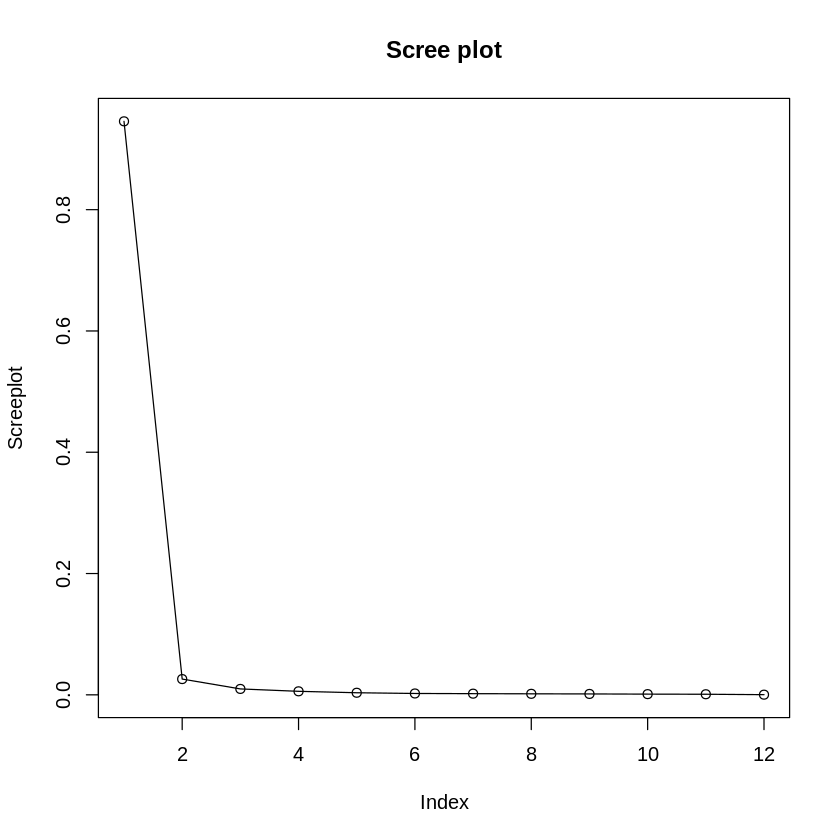

In [12]:
Screeplot<-eigen(bodyfat_cov)$values/sum(eigen(bodyfat_cov)$values)
plot(Screeplot, type = "o")
title("Scree plot")

Based on the methods outlined for determining the number of principal components to retain, the best number of components for this analysis is **2**

Importance of components:
                         Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.855668 1.02323438 0.83223395 0.75363672 0.69316015
Proportion of Variance 0.679570 0.08725072 0.05771778 0.04733069 0.04003925
Cumulative Proportion  0.679570 0.76682073 0.82453851 0.87186920 0.91190845
                           Comp.6     Comp.7     Comp.8     Comp.9     Comp.10
Standard deviation     0.53275074 0.50223059 0.45134578 0.40116294 0.276917766
Proportion of Variance 0.02365195 0.02101963 0.01697608 0.01341098 0.006390287
Cumulative Proportion  0.93556039 0.95658002 0.97355611 0.98696708 0.993357370
                           Comp.11     Comp.12
Standard deviation     0.246925531 0.136891712
Proportion of Variance 0.005081018 0.001561612
Cumulative Proportion  0.998438388 1.000000000

Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
weight   0.343         0.130                       0.127         0.102      

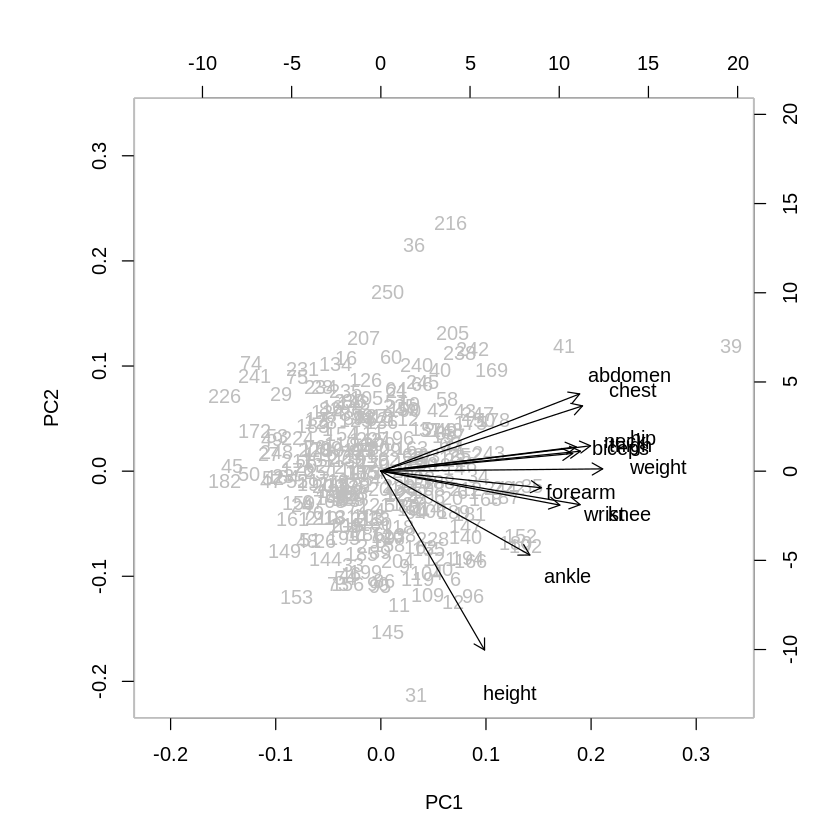

In [14]:
biplot(pca,col=c("gray","black"),xlab="PC1",ylab="PC2")
summary(pca, loadings = TRUE)

# **1. همپوشانی‌ها:**

abdomen و chest به نظر می‌رسد که همپوشانی زیادی دارند. هر دو ویژگی در نمودار بارگذاری به سمت PC1 کشیده شده‌اند، که نشان‌دهنده همبستگی بالا بین این دو ویژگی است. این یعنی که این دو ویژگی معمولاً به‌طور مشابه رفتار می‌کنند و برای مولفه اصلی اول تاثیر مشابهی دارند.

wrist و ankle نیز در یک مسیر مشابه قرار دارند و این می‌تواند نشان‌دهنده همپوشانی یا همبستگی بین این دو ویژگی باشد.
<br/>
**wrist & knee**
<br/>
**biceps & hip**
# **2.   زاویه 90 درجه :**

در نمودار بارگذاری، height و weight تقریباً در زاویه 90 درجه نسبت به هم قرار دارند. این نشان‌دهنده استقلال نسبی این دو ویژگی از یکدیگر است. یعنی تغییرات در height احتمالاً تاثیری بر weight ندارند و هر کدام به طور مستقل در مولفه‌های اصلی تاثیر دارند.

**abdomen $ height**
wrist و knee نیز تقریباً در زاویه 90 درجه با یکدیگر قرار دارند، نشان‌دهنده اینکه این دو ویژگی از یکدیگر مستقل هستند.

# **3.   بیشترین طول :**

weight و chest بیشترین طول را در نمودار دارند، به‌ویژه روی PC1، که نشان‌دهنده این است که این ویژگی‌ها بیشترین تاثیر را در این مولفه اصلی دارند و بیشترین واریانس داده‌ها را توضیح می‌دهند.

همچنین، height و forearm نیز طول زیادی دارند، که نشان‌دهنده اهمیت بالای این ویژگی‌ها در توضیح واریانس داده‌ها است.

از آنجایی که تمرکز این مطالعه بر روی بافت چربی بدن است و متغیر های مربوط به عرض بدن انسان به گونه ای نمایانگر اندازه بافت های چربی بدن هستند، می توان مولفه اصلی اول را “اندازه چربی بدن” و مولفه اصلی دوم را “ شکل چربی بدن” نامید.

#==========================EFA section==========================#


In [15]:
sapply(1:6, function(f)
factanal(covmat = bodyfat_cov, factors = f,
method = "mle", n.obs = 252)$PVAL)

objective     objective     objective     objective     objective 
7.564387e-104  2.377331e-56  1.449816e-26  7.140792e-08  8.331085e-04 
    objective 
 1.196324e-02

in here the first value is >0.05 is valid

In [16]:
factanal(covmat = bodyfat_cov, factors = 6,
method = "mle", n.obs = 252)


Call:
factanal(factors = 6, covmat = bodyfat_cov, n.obs = 252, method = "mle")

Uniquenesses:
 weight  height    neck   chest abdomen     hip   thigh    knee   ankle  biceps 
  0.005   0.195   0.223   0.062   0.065   0.042   0.096   0.005   0.547   0.203 
forearm   wrist 
  0.402   0.005 

Loadings:
        Factor1 Factor2 Factor3 Factor4 Factor5 Factor6
weight  0.733   0.392   0.266   0.360   0.187   0.262  
height          0.132   0.134   0.866   0.100          
neck    0.573   0.494   0.389   0.187           0.108  
chest   0.837   0.377   0.254           0.149          
abdomen 0.868   0.244   0.237           0.196   0.163  
hip     0.728   0.271   0.204   0.239   0.226   0.453  
thigh   0.560   0.418   0.121   0.193   0.282   0.533  
knee    0.495   0.287   0.251   0.364   0.651   0.221  
ankle   0.286   0.249   0.310   0.345   0.231   0.203  
biceps  0.457   0.658   0.217   0.160   0.148   0.247  
forearm 0.278   0.630   0.258   0.177   0.137          
wrist   0.335   0.334   0.

### **Factor 1: (چربی و اندازه بدن)**  
- **abdomen**: بارگذاری **0.868** — ارتباط بسیار قوی با فاکتور اول.  
- **chest**: بارگذاری **0.837** — تاثیر زیاد بر فاکتور اول.  
- **weight**: بارگذاری **0.733** — وزن، عامل اصلی در این فاکتور.  
- **hip**: بارگذاری **0.728** — تاثیر قابل توجه در فاکتور اول.  
این فاکتور احتمالاً به **چربی بدن** یا **اندازه بدنی** مربوط می‌شود.

---

### **Factor 2: (تناسب و ساختار بدن)**  
- **biceps**: بارگذاری **0.658** — اهمیت اندازه بازو (بایسپس) در این عامل.  
- **forearm**: بارگذاری **0.630** — تاثیرگذاری بالای اندازه ساعد.  
- **thigh**: بارگذاری **0.418** — تاثیر زیاد اندازه ران.  
این فاکتور به **تناسب اندام و ساختار عضلانی** مربوط است.

---

### **Factor 3: (ویژگی‌های پایین بدن)**  
- **wrist**: بارگذاری **0.831** — ارتباط زیاد با فاکتور سوم، احتمالاً به ویژگی‌های استخوانی پایین بدن مربوط می‌شود.  
- **ankle**: بارگذاری **0.310** — تاثیر کمتر نسبت به **wrist**.  
- **height**: بارگذاری **0.866** — ارتباط قوی قد با این فاکتور.  
این فاکتور می‌تواند با **ساختار استخوانی و ارتفاع بدن** ارتباط داشته باشد.

---

### **Factor 4: (متغیرهای مختلف و پراکنده)**  
- **neck**: بارگذاری **0.573** — ارتباط نسبی با فاکتور چهارم.  
- **knee**: بارگذاری **0.364** — تاثیر متوسط بر این فاکتور.  
- **hip**: بارگذاری **0.239** — تاثیر ضعیف‌تر نسبت به دیگر متغیرها.  
این فاکتور به **ویژگی‌های پراکنده بدن** مرتبط است.

---

### **Factor 5: (ویژگی‌های مختلف با تأثیر پایین)**  
- **hip**: بارگذاری **0.453** — تاثیر متوسط بر فاکتور.  
- **knee**: بارگذاری **0.651** — تاثیر قابل توجه نسبت به دیگر ویژگی‌ها.  
این فاکتور به **متغیرهای با تأثیر پایین‌تر** در بدن مربوط است.

---

### **Factor 6: (ویژگی‌های دست و پا)**  
- **wrist**: بارگذاری **0.334** — تاثیر کم ولی مهم در این فاکتور.  
- **forearm**: بارگذاری **0.258** — بارگذاری نسبتاً متوسط.  
- **ankle**: بارگذاری **0.203** — تاثیر ضعیف در این فاکتور.  
این فاکتور به **ویژگی‌های دست و پا** ارتباط دارد.

---

### **نتیجه‌گیری کلی:**  
- **Factor 1** بیشتر به **چربی بدن و اندازه بدنی** اشاره دارد.  
- **Factor 2** به **تناسب اندام و ساختار عضلانی** مرتبط است.  
- **Factor 3** به **ویژگی‌های پایین بدن** و **ارتفاع** مربوط می‌شود.  
- **Factor 4** به **متغیرهای پراکنده و جزئی** اشاره دارد.  
- **Factor 5** ویژگی‌هایی با **تأثیر پایین‌تر** را شامل می‌شود.  
- **Factor 6** بیشتر به **ویژگی‌های دست و پا** مرتبط است.


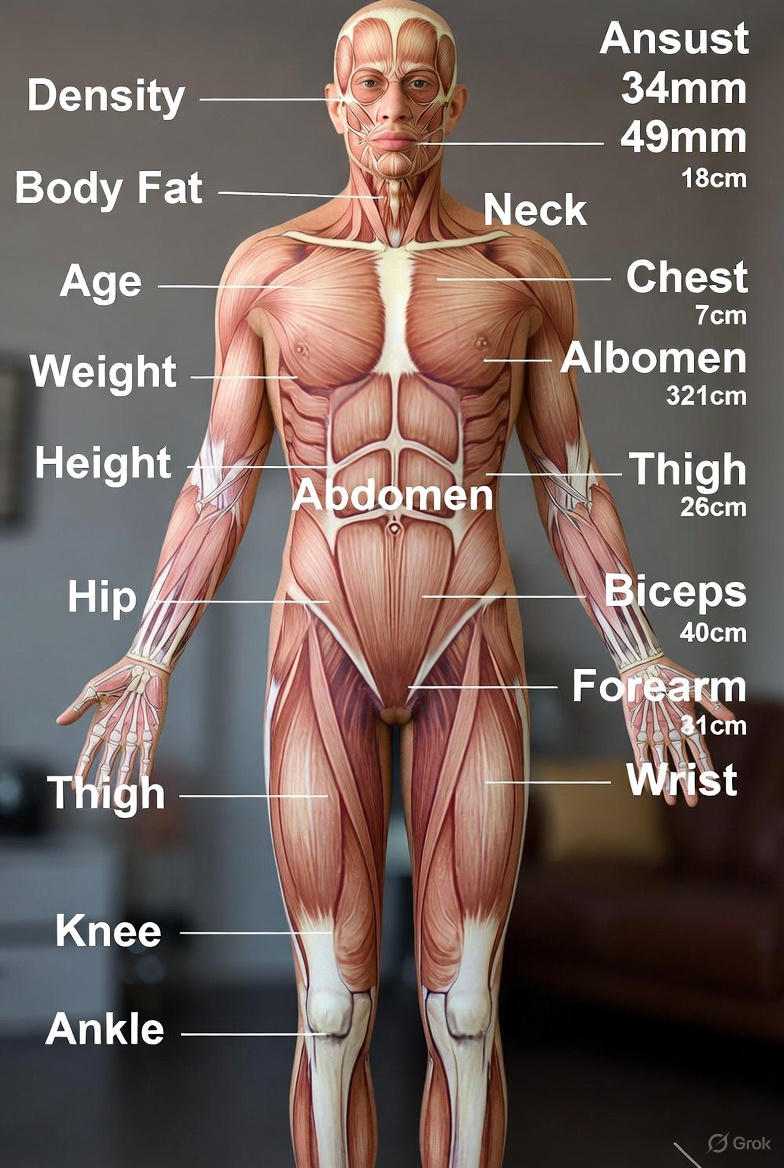

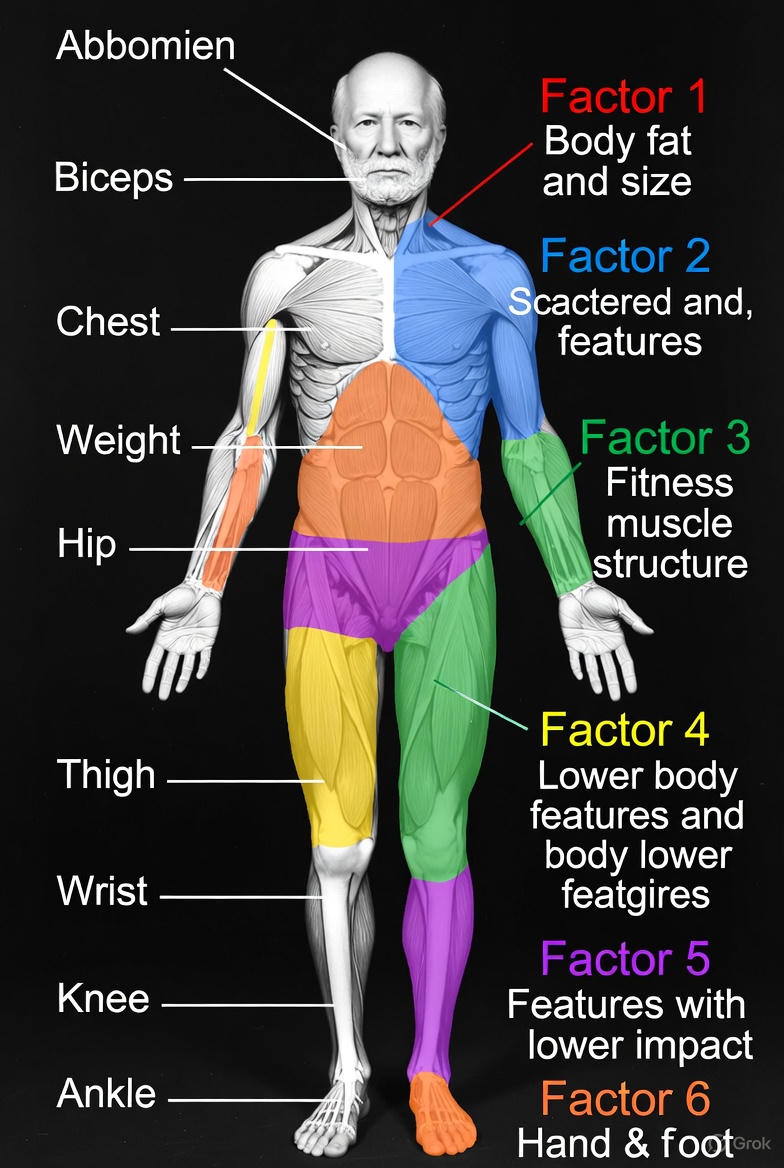